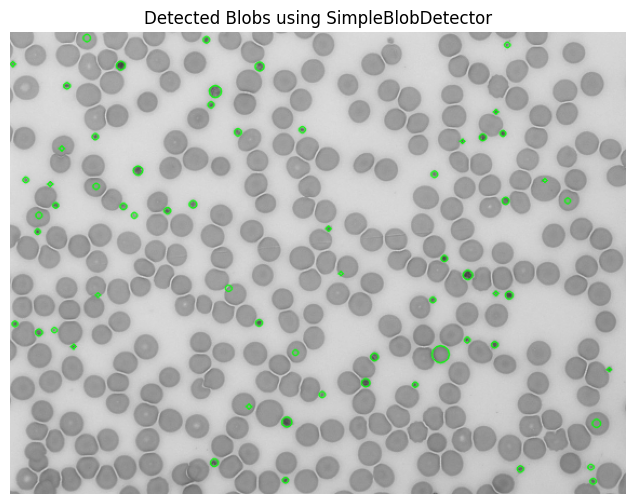

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "platelets.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 10
params.maxArea = 220

params.filterByCircularity = True
params.minCircularity = 0.6

params.filterByConvexity = True
params.minConvexity = 0.5

params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image)

image_with_blobs = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 255, 0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(10, 6))
plt.imshow(image_with_blobs, cmap='gray')
plt.title("Detected Blobs using SimpleBlobDetector")
plt.axis("off")
plt.show()

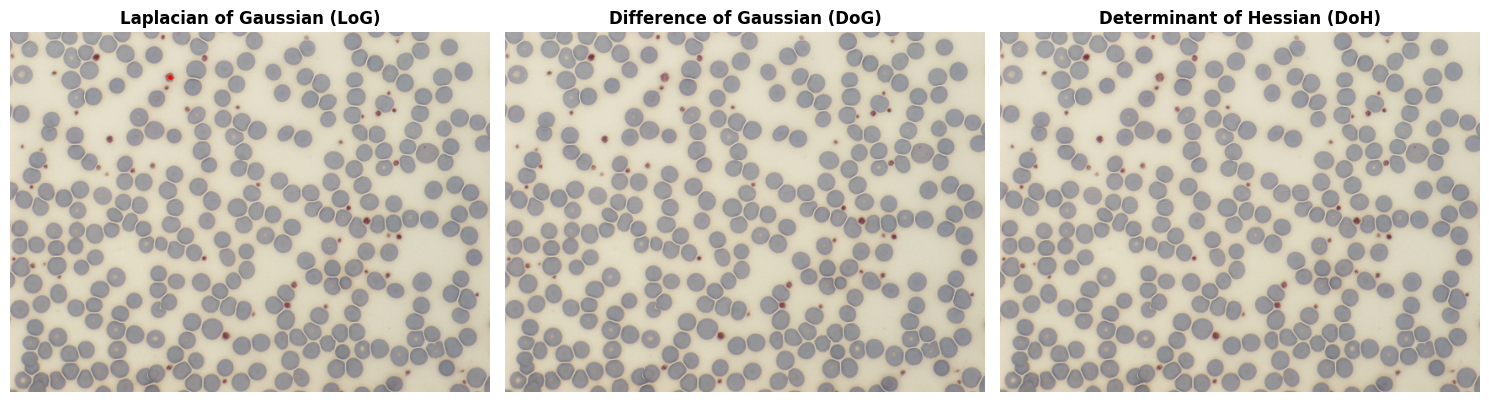

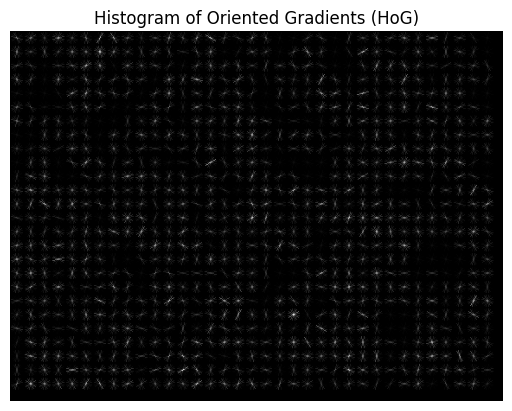

In [7]:
from skimage.feature import blob_log, blob_dog, blob_doh, hog
from skimage import img_as_float

image_path = "platelets.png"
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
image_float = img_as_float(image_gray)

image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)

blobs_log = blob_log(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.02, overlap=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2) 

blobs_dog = blob_dog(image_float, min_sigma=1, max_sigma=3, sigma_ratio=1.6, threshold=0.02, overlap=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.01, overlap=0.1)

def filter_blobs(blobs):
    return np.array([blob for blob in blobs if mask_purple[int(blob[0]), int(blob[1])] > 0])

filtered_log = filter_blobs(blobs_log)
filtered_dog = filter_blobs(blobs_dog)
filtered_doh = filter_blobs(blobs_doh)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Laplacian of Gaussian (LoG)", "Difference of Gaussian (DoG)", "Determinant of Hessian (DoH)"]
blobs_list = [filtered_log, filtered_dog, filtered_doh]

for ax, title, blobs in zip(axes, titles, blobs_list):
    ax.imshow(image_color, cmap='gray')
    for y, x, r in blobs:
        ax.add_patch(plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False))
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis("off")

plt.tight_layout()
plt.show()

fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

plt.imshow(hog_image, cmap='gray')
plt.title("Histogram of Oriented Gradients (HoG)")
plt.axis("off")
plt.show()

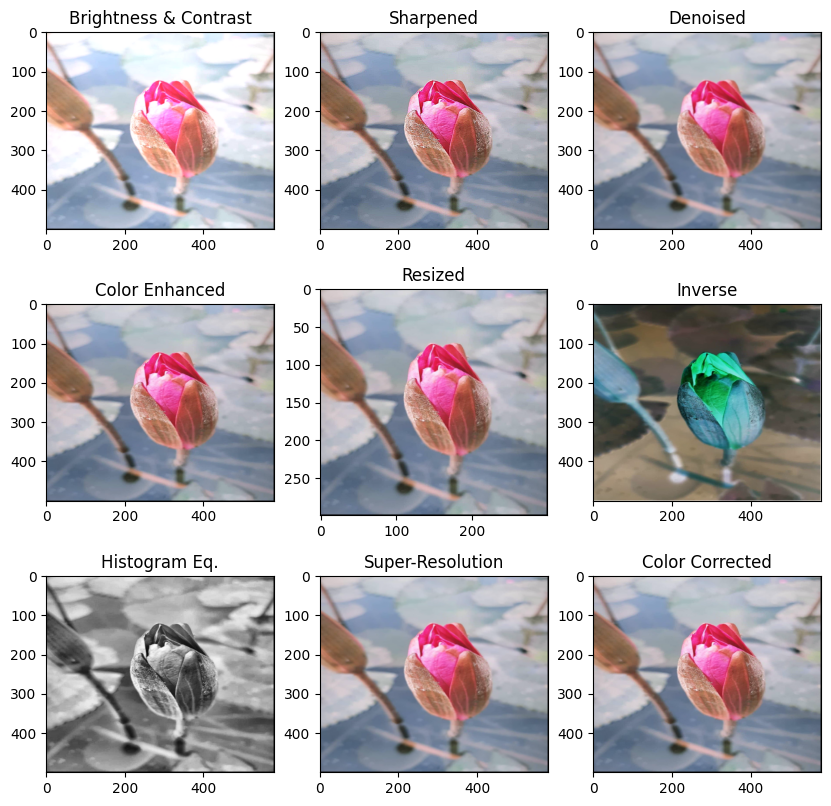

In [34]:
from skimage.exposure import equalize_hist

filepath = "flower.png"
# Load Image
def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    # Convert RGB to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(gray)

    return cl



def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

# Example Usage
if __name__ == "__main__":
    img_path = "flower.png"
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Display Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Denoised')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Eq.')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()

Number of candies detected: 18


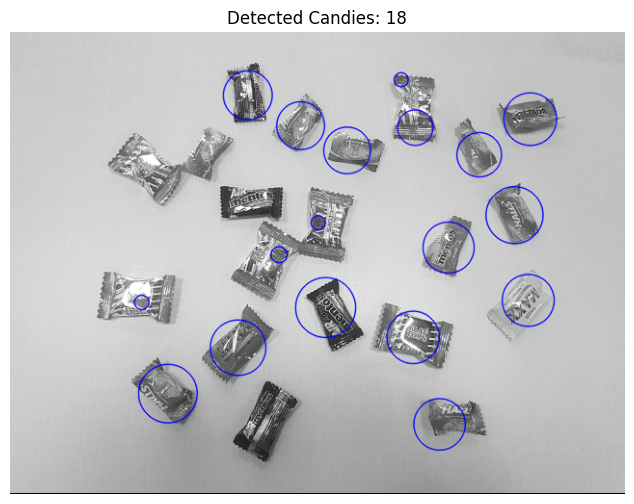

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (assuming it's in grayscale for blob detection)
image_path = "candies.png"  # Replace with actual path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area (size of blobs)
params.filterByArea = True
params.minArea = 100   # Adjust based on candy size
params.maxArea = 4000

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia (shape roundness)
params.filterByInertia = True
params.minInertiaRatio = 0.2

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
image_with_blobs = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Count the blobs
num_candies = len(keypoints)
print("Number of candies detected:", num_candies)

# Display the image with blobs
plt.figure(figsize=(10, 6))
plt.imshow(image_with_blobs, cmap='gray')
plt.title(f"Detected Candies: {num_candies}")
plt.axis("off")
plt.show()


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets
# import time
# from torchvision.models import vgg16, alexnet
# from torch.utils.data import DataLoader

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Enhanced Data Augmentation
# transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),  # Helps generalization
#     transforms.RandomCrop(32, padding=4),
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
# ])

# train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)


# def get_model(model_name):
#     if model_name == "alexnet":
#         model = alexnet(pretrained=True)
#         for param in model.features.parameters():
#             param.requires_grad = True

#         model.classifier = nn.Sequential(
#             nn.Linear(9216, 4096),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(4096, 4096),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(4096, 100)
#         )
#     elif model_name == "vgg16":
#         model = vgg16(pretrained=True)
#         for param in model.features.parameters():
#             param.requires_grad = True
#         model.classifier[6] = nn.Linear(4096, 100)

#     return model.to(device)

# # Training Function with Gradient Clipping
# def train_model(model, train_loader, criterion, optimizer, scheduler, epochs=5):
#     model.train()
#     for epoch in range(epochs):
#         running_loss = 0.0
#         for images, labels in train_loader:
#             images, labels = images.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Avoid exploding gradients
#             optimizer.step()
#         scheduler.step()
#         print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# # Evaluation Function
# def evaluate_model(model, test_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     start_time = time.time()
#     with torch.no_grad():
#         for images, labels in test_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     end_time = time.time()
#     accuracy = 100 * correct / total
#     print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
#     return accuracy, end_time - start_time

# # Train and Evaluate AlexNet
# alexnet_model = get_model("alexnet")
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(alexnet_model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)  # Better generalization
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)  # Learning rate decay
# train_model(alexnet_model, train_loader, criterion, optimizer, scheduler, epochs=5)
# alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# # Train and Evaluate VGG16
# vgg16_model = get_model("vgg16")
# optimizer = optim.SGD(vgg16_model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)
# train_model(vgg16_model, train_loader, criterion, optimizer, scheduler, epochs=5)
# vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# # Compare Results
# print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
# print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")


Files already downloaded and verified


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time
from torchvision.models import vgg16, alexnet
from torch.utils.data import DataLoader, Subset
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-100
full_train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
full_test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create smaller subsets (e.g., 10% of data)
subset_ratio = 0.1
train_indices = np.random.choice(len(full_train_dataset), int(len(full_train_dataset) * subset_ratio), replace=False)
test_indices = np.random.choice(len(full_test_dataset), int(len(full_test_dataset) * subset_ratio), replace=False)

train_dataset = Subset(full_train_dataset, train_indices)
test_dataset = Subset(full_test_dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Load models
def get_model(model_name):
    if model_name == "alexnet":
        model = alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    return model.to(device)

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=3):  # fewer epochs
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
    return accuracy, end_time - start_time

# Train & evaluate AlexNet
alexnet_model = get_model("alexnet")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, criterion, optimizer, epochs=3)
alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# Train & evaluate VGG16
vgg16_model = get_model("vgg16")
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
train_model(vgg16_model, train_loader, criterion, optimizer, epochs=3)
vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# Compare results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")


C:\Users\Tapassya Chaudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
100%|██████████| 169M/169M [00:21<00:00, 7.96MB/s] 
C:\Users\Tapassya Chaudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Tapassya Chaudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWa

Epoch 1, Loss: 4.5456
Epoch 2, Loss: 4.3782
Epoch 3, Loss: 4.3217
Accuracy: 3.60%, Inference Time: 8.92s


C:\Users\Tapassya Chaudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Tapassya Chaudhary/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:05<00:00, 8.49MB/s] 
